In [7]:
import numpy as np
import pandas as pd
from pandas import DataFrame, pivot_table, read_csv

from rxtrade.data import add_amplitude_column, add_basic_columns
from rxtrade.utils import get_data_files

In [8]:
def add_stats_columns(ticker: str, file_path: str) -> DataFrame:
    df = read_csv(file_path)

    add_basic_columns(df)
    add_amplitude_column(ticker, df)

    df[f"Close ({ticker})"] = df["close"]
    return df

In [9]:
def process_for_pivot(ticker: str, df: DataFrame) -> None:
    df[f"Amplitude ({ticker})"] = df[f"Amplitude ({ticker})"] / (df[f"Close ({ticker})"] / df[f"Close (NQ)"])

In [10]:
def make_pivot(tickers: list[str], df: DataFrame) -> DataFrame:
    return pivot_table(
        df,
        values=[f"Amplitude ({ticker})" for ticker in tickers],
        index=["Market Date", "Market Code"],
        aggfunc={
            f"Amplitude ({ticker})": np.nanmean for ticker in tickers
        },
        dropna=False,
    )

In [11]:
tickers = []
df = DataFrame(columns=["time"])

for data_file in get_data_files("./archive/futures/**/*.csv"):
    if data_file.period != 5:
        continue

    tickers.append(data_file.ticker)
    ticker_df = add_stats_columns(data_file.ticker, data_file.file_path)

    if len(df):
        df = df.merge(ticker_df, left_on="time", right_on="time")
    else:
        df = ticker_df

for ticker in tickers:
    process_for_pivot(ticker, df)

pd.options.display.max_rows = 999

pivot = make_pivot(tickers, df)
pivot

Amplitude (ES)  Amplitude (NQ)  Amplitude (YM)
Market Date Market Code                                                
2021-12-06  E                  6.173219        8.010152        5.505402
            R                 12.065165       17.942308        9.014030
2021-12-07  E                  4.329326        5.443182        4.018632
            R                  6.774732       10.266026        6.076447
2021-12-08  E                  4.679203        5.184343        5.055447
            R                  6.875592       10.823718        6.513487
2021-12-09  E                  3.785139        3.930556        4.214563
            R                  7.827090       13.625000        6.082747
2021-12-10  E                  3.519758        4.588384        3.674657
            R                  8.770243       14.596154        6.256132
2021-12-13  E                  3.419546        3.585859        3.549491
            R                  8.359175       12.900641        7.532268
2021-12-14  E                  4.479461        5.479798        4.275135
            R                  9.954003       15.599359        9.029820
2021-12-15  E                  3.799768        5.202020        3.668030
            R                 13.431764       20.605769       12.151518
2021-12-16  E                  4.706888        5.659091        4.313329
            R                 13.546300       20.836538       11.015084
2021-12-17  E                  5.737943        8.474747        4.982398
            R                 17.272850       25.141026       13.925478
2021-12-20  E                  8.511786        8.601010        8.884865
            R                 12.922856       17.025641       10.805868
2021-12-21  E                  5.096049        5.960859        4.998080
            R                  9.560808       12.862179        9.390435
2021-12-22  E                  3.782812        4.645202        3.561150
            R                  6.802204       11.951923        6.004867
2021-12-23  E                  2.690852        3.404040        2.670915
            R                  5.399231        7.006410        5.246572
2021-12-27  E                  2.778811        3.268939        2.936368
            R                  4.600128        7.362179        4.807527
2021-12-28  E                  2.897058        3.556818        2.861778
            R                  7.315457       11.528846        7.225260
2021-12-29  E                  2.726428        3.758838        2.623284
            R                  5.552016        8.471154        4.929065
2021-12-30  E                  2.645988        3.204545        2.650879
            R                  5.215573        7.419872        5.248773
2021-12-31  E                  3.342573        3.791667        3.440828
            R                  6.992204        9.923077        6.705447
2022-01-03  E                  3.212557        3.722222        3.328020
            R                  7.711702       11.939103        8.947375
2022-01-04  E                  2.637042        3.599747        2.424478
            R                  7.534597       13.375000        6.664145
2022-01-05  E                  3.374687        4.568182        3.212378
            R                  8.828837       15.589744        8.355648
2022-01-06  E                  6.679443        9.616162        5.430158
            R                 11.516827       19.823718        9.521635
2022-01-07  E                  4.672832        7.405303        3.793056
            R                  8.905288       15.814103        7.185495
2022-01-10  E                  5.210925        7.718434        4.386732
            R                 13.867673       18.801282       11.390190
2022-01-11  E                  5.091344        7.306818        4.325514
            R                 10.184959       16.637821        8.724636
2022-01-12  E                  4.004341        6.166667        3.560395
            R                  8.404926       12.881410        8.

<AxesSubplot:xlabel='Market Date,Market Code'>

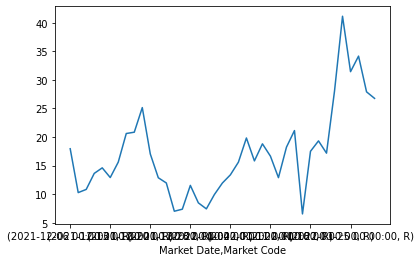

In [12]:
pivot[pivot.index.get_level_values("Market Code") == "R"]["Amplitude (NQ)"].plot.line()
